In [1]:
import numpy as np
import pandas as pd
import bbi
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import bioframe as bf
import cooltools
import cooltools.lib.plotting
import cooler
import HistogramsPlotting
from matplotlib.colors import LogNorm

In [2]:
#### A way to use externel fonts in matplotlib without installing it
from matplotlib import font_manager
font_dirs = ['/users/ankit.gupta/.fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
#### A way to use externel fonts in matplotlib without installing it

mpl.rcParams['font.family'] = 'Nunito'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

In [3]:
microCRes = 10000
cools = {}
cools["WT"] = cooler.Cooler(f"/groups/goloborodko/projects/lab/pavri-spt5/mm9/distiller_0.3.3/results/coolers_library_group/WT.mm9.mapq_30.100.mcool::resolutions/{microCRes}")
cools["KO"] = cooler.Cooler(f"/groups/goloborodko/projects/lab/pavri-spt5/mm9/distiller_0.3.3/results/coolers_library_group/KO.mm9.mapq_30.100.mcool::resolutions/{microCRes}")
mm9_chromsizes = bf.fetch_chromsizes('mm9')
mm9_cens = bf.fetch_centromeres('mm9') ### Mouse chromosomes are telocentric
mm9_chroms = bf.core.construction.add_ucsc_name_column(bf.make_chromarms(mm9_chromsizes,  mm9_cens))
mm9_chroms = mm9_chroms[mm9_chroms.chrom.isin(cools["WT"].chromnames)].reset_index(drop=True)

In [4]:
# bins = cools["WT"].bins()[:]
# mm9Genome = bf.load_fasta('/groups/goloborodko/genomepy/mm9/mm9.fa');
# ## note the next command may require installing pysam
# gcCov = bf.frac_gc(bins[['chrom', 'start', 'end']], mm9Genome)
# gcCov.to_csv(f'./mm9_gc_cov_{microCRes//1000}kb.tsv',index=False,sep='\t')

In [5]:
gcCov = pd.read_csv(f'../compartments_analysis/mm9_gc_cov_{microCRes//1000}kb.tsv', sep="\t")

In [6]:
gcCov

,chrom,start,end,GC
0,chr1,0,10000,NaN
1,chr1,10000,20000,NaN
2,chr1,20000,30000,NaN
3,chr1,30000,40000,NaN
4,chr1,40000,50000,NaN
...,...,...,...,...
265497,chrY,15880000,15890000,NaN
265498,chrY,15890000,15900000,NaN
265499,chrY,15900000,15902555,NaN
265500,chrM,0,10000,0.366500


In [7]:
# %%time
# # obtain first 3 eigenvectors
# wt_cis_eigs = cooltools.eigs_cis(
#                         cools["WT"],
#                         gcCov,
#                         view_df=mm9_chroms,
#                         n_eigs=3,
#                         )

# # cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
# wt_eigenvector_track = wt_cis_eigs[1][['chrom','start','end','E1']]
# wt_cis_eigs[0].to_csv(f"wt_cis_eigs_{microCRes//1000}kb.tsv",sep="\t",index=False)
# ko_cis_eigs[0].to_csv(f"ko_cis_eigs_{microCRes//1000}kb.tsv",sep="\t",index=False)

In [8]:
# %%time
# # obtain first 3 eigenvectors
# ko_cis_eigs = cooltools.eigs_cis(
#                         cools["KO"],
#                         gcCov,
#                         view_df=mm9_chroms,
#                         n_eigs=3,
#                         )

# # cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
# ko_eigenvector_track = ko_cis_eigs[1][['chrom','start','end','E1']]
# wt_cis_eigs[1].to_csv(f"wt_cis_eigenvector_tracks_{microCRes//1000}kb.tsv",sep="\t",index=False)
# ko_cis_eigs[1].to_csv(f"ko_cis_eigenvector_tracks_{microCRes//1000}kb.tsv",sep="\t",index=False)

In [9]:
wt_eigenvector_track = pd.read_csv(f"../compartments_analysis/wt_cis_eigenvector_tracks_{microCRes//1000}kb.tsv",sep="\t")
ko_eigenvector_track = pd.read_csv(f"../compartments_analysis/ko_cis_eigenvector_tracks_{microCRes//1000}kb.tsv",sep="\t")

In [10]:
wt_eigenvector_track

,chrom,start,end,weight,E1,E2,E3
0,chr1,0,10000,NaN,NaN,NaN,NaN
1,chr1,10000,20000,NaN,NaN,NaN,NaN
2,chr1,20000,30000,NaN,NaN,NaN,NaN
3,chr1,30000,40000,NaN,NaN,NaN,NaN
4,chr1,40000,50000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
265497,chrY,15880000,15890000,NaN,NaN,NaN,NaN
265498,chrY,15890000,15900000,NaN,NaN,NaN,NaN
265499,chrY,15900000,15902555,NaN,NaN,NaN,NaN
265500,chrM,0,10000,0.010911,NaN,NaN,NaN


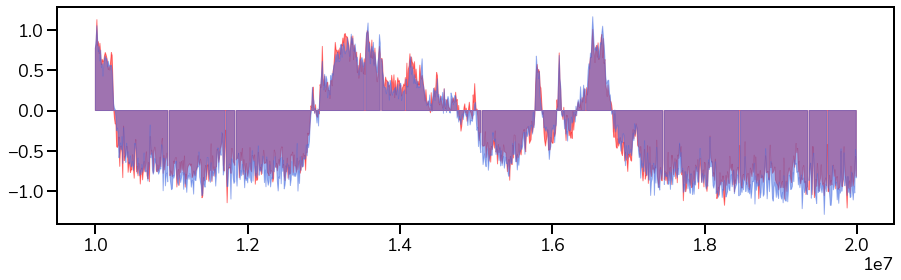

In [11]:
fig,ax = plt.subplots(figsize=(15,4))
pts = slice(1000,2000)
ax.fill_between(wt_eigenvector_track.start[pts],wt_eigenvector_track.E1[pts],alpha=0.5,color="red")
ax.fill_between(ko_eigenvector_track.start[pts],ko_eigenvector_track.E1[pts],alpha=0.5,color='royalblue')

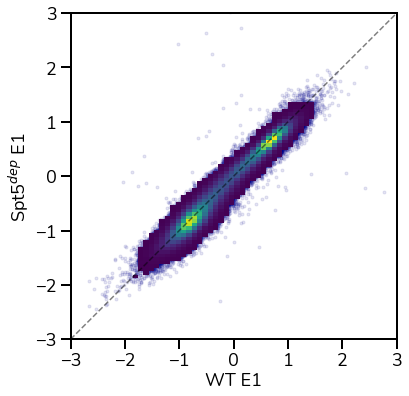

In [16]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(wt_eigenvector_track.E1,ko_eigenvector_track.E1,marker=".",alpha=0.1,c="darkblue",rasterized=True)
HistogramsPlotting.Plot2DHist(wt_eigenvector_track.E1, 
                              ko_eigenvector_track.E1, 
                              ax=ax, 
                              bins=100, 
                              hist2dKwargs=dict(cmap="viridis",cmin=10,),
                             )
ax.set(#title="Eigenvector tracks",
       xlabel="WT E1", 
       ylabel="Spt5$^{dep}$ E1",
       xlim=(-3,3),ylim=(-3,3))
ax.axline((0,0),(1,1),ls="--",c="k",alpha=0.5)
ax.set_aspect(1)
plt.savefig("e1_e1_2dhist.png",dpi=300,bbox_inches="tight")
plt.savefig("e1_e1_2dhist.pdf",dpi=300,bbox_inches="tight")